# Artificial Neural Networks - Third Assignment
 
#### Kiana Ghamsari 400222079

<hr>


## Practical Exercise

### Problem Description

#### Architectural Heritage Elements Image64 Dataset
The Architectural Heritage Elements Dataset (AHE) is an image dataset for developing deep learning algorithms and specific techniques in the classification of architectural heritage images.

This dataset consists of 10235 images classified into ten categories:

* Altar: 829 images
* Apse: 514 images
* Bell tower: 1059 images
* Column: 1919 images
* Dome (inner): 616 images
* Dome (outer): 1177 images
* Flying buttress: 407 images
* Gargoyle (and Chimera): 1571 images
* Stained glass: 1033 images
* Vault: 1110 images

### CNN Model Training:

The first objective is to build and train a Convolutional Neural Network (CNN) that can classify images from the Architectural Heritage Elements Image64 Dataset. This involves preprocessing the data, designing the CNN architecture, and training the model using a suitable optimization algorithm.


#### Methodology:

* Data Preprocessing:
The images will be preprocessed for the model. This may include resizing the images, normalizing the pixel values, etc.
* Model Building:
A CNN model will be built using libraries such as PyTorch. The model includes several convolutional and pooling layers, followed by dense layers.
* Training:
The model will be trained on a portion of the dataset. Various strategies like data augmentation, dropout, etc., are used to improve the model’s performance and prevent overfitting.
* Evaluation:
The model’s performance will be evaluated on a separate test set. Metrics
such as accuracy is used for this purpose.
* Optimization:
Based on the evaluation results, the model will be further optimized by tuning hyperparameters, modifying the architecture, etc.

## Code Implementation:

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [56]:
import torch
print(torch.cuda.is_available())

True


Mean pixel value: 107.311643836717
Standard deviation of pixel values: 67.6222712752013
Mean pixel value: 111.86345166154736
Standard deviation of pixel values: 64.50434103131725
Epoch 1/10, Train Loss: 0.5673381719011931, Test Loss: 0.3173232673752037, Test Accuracy: 0.9009971509971509
Epoch 2/10, Train Loss: 0.19638018435417856, Test Loss: 0.27719056640159, Test Accuracy: 0.9074074074074074
Epoch 3/10, Train Loss: 0.11085239156448054, Test Loss: 0.28267094238915225, Test Accuracy: 0.9145299145299145
Epoch 4/10, Train Loss: 0.051293361287728045, Test Loss: 0.26166202111000364, Test Accuracy: 0.9323361823361823
Epoch 5/10, Train Loss: 0.03910794434922531, Test Loss: 0.2682352634993466, Test Accuracy: 0.9316239316239316
Epoch 6/10, Train Loss: 0.03561648422026269, Test Loss: 0.27459486353803764, Test Accuracy: 0.9337606837606838
Epoch 7/10, Train Loss: 0.02919924157487123, Test Loss: 0.27715546637773514, Test Accuracy: 0.9323361823361823
Epoch 8/10, Train Loss: 0.03013445399320866, Test

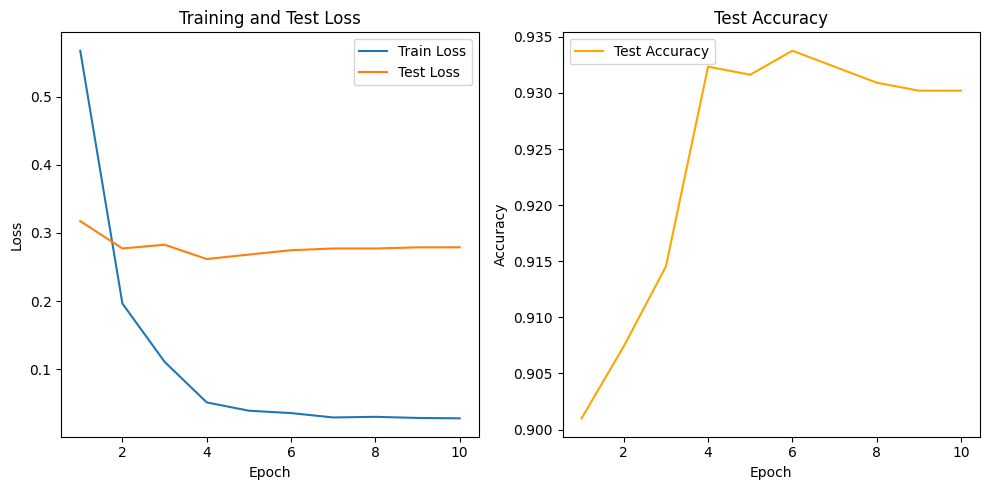

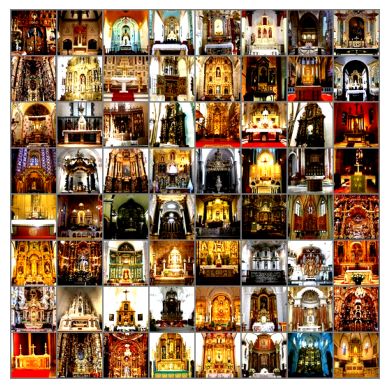

GroundTruth:  altar altar altar altar
Predicted:  altar altar altar altar


In [57]:
import os
import numpy as np
from PIL import Image
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import torch.nn as nn
import torch.optim as optim
from torchvision.models import vgg16
from torchvision.models.vgg import VGG16_Weights
import torchvision
import matplotlib.pyplot as plt

# Define the paths to the test and train folders
test_dataset_path = "/kaggle/input/architectural-heritage-elements-image64-dataset/test"
train_dataset_path = "/kaggle/input/architectural-heritage-elements-image64-dataset/train"

# List files in the test folder
test_files = os.listdir(test_dataset_path)
# print("Files in the test folder:")
# for file in test_files:
#     print(os.path.join(test_dataset_path, file))

# List files in the train folder
train_files = os.listdir(train_dataset_path)
# print("\nFiles in the train folder:")
# for file in train_files:
#     print(os.path.join(train_dataset_path, file))



# Define the path to dataset
dataset_path = train_dataset_path

# Initialize lists to store pixel values
pixel_values = []

# Iterate over images in the dataset
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        # Open the image and convert it to a numpy array
        image = np.array(Image.open(image_path))
        # Append pixel values to the list
        pixel_values.extend(image.flatten())

# Convert the list to a numpy array
pixel_values = np.array(pixel_values)

# Compute mean and standard deviation
mean = np.mean(pixel_values)
std = np.std(pixel_values)

print("Mean pixel value:", mean)
print("Standard deviation of pixel values:", std)


# Define the path to dataset
dataset_path = test_dataset_path

# Initialize lists to store pixel values
pixel_values = []

# Iterate over images in the dataset
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        # Open the image and convert it to a numpy array
        image = np.array(Image.open(image_path))
        # Append pixel values to the list
        pixel_values.extend(image.flatten())

# Convert the list to a numpy array
pixel_values = np.array(pixel_values)

# Compute mean and standard deviation
mean = np.mean(pixel_values)
std = np.std(pixel_values)

print("Mean pixel value:", mean)
print("Standard deviation of pixel values:", std)



# Define mean and standard deviation for the train dataset
train_mean = 107.31 / 255.0  # Convert mean to [0, 1] range
train_std = 67.62 / 255.0  # Convert std to [0, 1] range

# Define data augmentation and normalization transformations for the train dataset
train_normalize_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomRotation(10),
#     transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[train_mean, train_mean, train_mean], std=[train_std, train_std, train_std])  # Normalize pixel values
])

# Load train dataset with normalization transform
train_dataset = ImageFolder(train_dataset_path, transform=train_normalize_transform)

# Create train data loader
train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define mean and standard deviation for the test dataset
test_mean = 111.86345166154736 / 255.0  # Convert mean to [0, 1] range
test_std = 64.50434103131721 / 255.0  # Convert std to [0, 1] range

# Define normalization transform for the test dataset
test_normalize_transform = transforms.Compose([
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[test_mean, test_mean, test_mean], std=[test_std, test_std, test_std])  # Normalize pixel values
])

# Load test dataset with normalization transform
test_dataset = ImageFolder(test_dataset_path, transform=test_normalize_transform)

# Create test data loader
test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)


# Define the VGG16 model with dropout
class VGG16WithDropout(nn.Module):
    def __init__(self, num_classes):
        super(VGG16WithDropout, self).__init__()
        self.vgg16 = vgg16(weights=VGG16_Weights.DEFAULT)
        self.classifier = nn.Sequential(
            nn.Linear(25088, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.vgg16.features(x)
        x = self.vgg16.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x



vgg_model = VGG16WithDropout(num_classes = len(train_dataset.classes))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg_model.to(device) # Move the modified model to the device


# Set the model to evaluation mode
vgg_model.eval()


# Modify the last fully connected layer to match the number of classes in dataset
num_classes = len(train_dataset.classes)
vgg_model.classifier[6] = nn.Linear(4096, num_classes)
vgg_model.to(device)  # Move the modified model to the device

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg_model.parameters(), lr=0.001, momentum=0.9)


# Training loop
def train(model, train_loader, criterion, optimizer):
    vgg_model.train()  # Set model to training mode
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to CUDA device
        optimizer.zero_grad()  # Zero the gradients
        outputs = vgg_model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update the parameters
        running_loss += loss.item()
    return running_loss / len(train_loader)

# Evaluation loop
def evaluate(vgg_model, test_loader, criterion):
    vgg_model.eval()  # Set model to evaluation mode
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to CUDA device
            outputs = vgg_model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate the loss
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)
    accuracy = correct_predictions / total_predictions
    return running_loss / len(test_loader), accuracy

# Define a learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)  # Reduce learning rate by a factor of 0.1 every 3 epochs


# Initialize lists to store loss and accuracy values
train_losses = []
test_losses = []
test_accuracies = []


# Main training loop with learning rate scheduler
num_epochs = 10
for epoch in range(num_epochs):
    train_loss = train(vgg_model, train_data_loader, criterion, optimizer)
    test_loss, test_accuracy = evaluate(vgg_model, test_data_loader, criterion)
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss}, Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')
    
    # Append loss and accuracy values to lists
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    
    # Update the learning rate
    scheduler.step()
    
    

# Plot loss and accuracy
plt.figure(figsize=(10, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), test_accuracies, label='Test Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
    
    

# Function to display images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.cpu().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')  # Turn off axis
    plt.show()

# Get some random test images
dataiter = iter(test_data_loader)
images, labels = next(dataiter)

# Move images to the device
images = images.to(device)

# Make predictions
outputs = vgg_model(images)
_, predicted = torch.max(outputs, 1)

# Display the images along with their predicted labels
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % test_dataset.classes[labels[j]] for j in range(4)))
print('Predicted: ', ' '.join('%5s' % test_dataset.classes[predicted[j]] for j in range(4)))


For the deconvolution tasks, I tried several methods but got errors and there was no time to handle them. So here are the commented-out codes:

In [58]:
# class VGG16WithDeconv(nn.Module):
#     def __init__(self, num_classes):
#         super(VGG16WithDeconv, self).__init__()
#         # Load the pretrained VGG16 model
#         self.vgg16 = vgg16(weights=VGG16_Weights.DEFAULT)
#         # Remove the last fully connected layer (classifier)
#         self.vgg16.classifier = nn.Sequential(*list(self.vgg16.classifier.children())[:-1])
#         # Define deconvolution layers for visualization
#         self.deconv_layers = nn.ModuleList([
#             nn.ConvTranspose2d(512, 512, kernel_size=3, stride=2, padding=1, output_padding=1),
#             nn.ConvTranspose2d(512, 256, kernel_size=3, stride=2, padding=1, output_padding=1),
#             nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1),
#             nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
#             nn.ConvTranspose2d(64, 3, kernel_size=3, stride=2, padding=1, output_padding=1)
#         ])
#         # Define a convolution layer to adjust the number of channels
#         self.conv_adjust = nn.Conv2d(512, 512, kernel_size=1)
#         # Define a fully connected layer for classification
#         self.fc = nn.Linear(512, num_classes)

#     def forward(self, x):
#         # Forward pass through VGG16 model
#         x = self.vgg16.features(x)
#         # Save the output of each maxpool layer for deconvolution
#         maxpool_indices = [4, 9, 16, 23, 30]
#         maxpool_outputs = []
#         for idx, layer in enumerate(x):
#             if idx in maxpool_indices:
#                 maxpool_outputs.append(layer)
#         # Perform deconvolution
#         deconv_output = None
#         for idx, deconv_layer in enumerate(self.deconv_layers):
#             if deconv_output is None:
#                 deconv_output = deconv_layer(x)
#             else:
#                 deconv_output = deconv_layer(deconv_output)
#             if idx < len(maxpool_outputs):
#                 # Concatenate with the corresponding maxpool layer output
#                 deconv_output = torch.cat([deconv_output, maxpool_outputs[-(idx + 1)]], dim=1)
#         # Adjust the number of channels
#         deconv_output = self.conv_adjust(deconv_output)
#         # Global average pooling
#         deconv_output = torch.mean(deconv_output, dim=[2, 3])
#         # Classification
#         output = self.fc(deconv_output)
#         return output



# import torch.nn as nn

# # Define the VGG16 model with deconvolution for visualization
# class VGG16WithDeconv(nn.Module):
#     def __init__(self, num_classes):
#         super(VGG16WithDeconv, self).__init__()
#         self.vgg16 = vgg16(weights=VGG16_Weights.DEFAULT)  # Load pretrained VGG16
#         self.features = self.vgg16.features  # Extract features part of VGG16
#         self.avgpool = self.vgg16.avgpool  # Average pooling layer
#         self.flatten = nn.Flatten()  # Flatten layer to convert 3D tensor to 1D tensor
#         self.classifier = nn.Sequential(
#             nn.Linear(512 * 7 * 7, 4096),
#             nn.ReLU(True),
#             nn.Dropout(),
#             nn.Linear(4096, 4096),
#             nn.ReLU(True),
#             nn.Dropout(),
#             nn.Linear(4096, num_classes)
#         )  # Classifier layers

#         # Define deconvolution layers for visualization
#         self.deconv_layers = nn.ModuleList([
#             nn.ConvTranspose2d(512, 512, kernel_size=3, stride=2, padding=1, output_padding=1),  # Upsample
#             nn.ReLU(inplace=True),
#             nn.ConvTranspose2d(512, 512, kernel_size=3, stride=2, padding=1, output_padding=1),  # Upsample
#             nn.ReLU(inplace=True),
#             nn.ConvTranspose2d(512, 256, kernel_size=3, stride=2, padding=1, output_padding=1),  # Upsample
#             nn.ReLU(inplace=True),
#             nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1),  # Upsample
#             nn.ReLU(inplace=True),
#             nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),  # Upsample
#             nn.ReLU(inplace=True),
#             nn.ConvTranspose2d(64, 3, kernel_size=3, stride=2, padding=1, output_padding=1),  # Upsample
#             nn.ReLU(inplace=True)
#         ])

#     def forward(self, x):
#         # Forward pass through the convolutional layers
#         x = self.features(x)

#         # Forward pass through the deconvolution layers for visualization
#         deconv_outputs = []
#         for layer in self.deconv_layers:
#             x = layer(x)
#             deconv_outputs.append(x.clone())  # Save the output of each deconv layer for visualization

#         # Forward pass through the remaining layers
#         x = self.avgpool(x)
#         x = torch.flatten(x, 1)
#         x = self.classifier(x)

#         return x, deconv_outputs




# import torch
# import torch.nn as nn
# import torchvision.models as models

# import sys

# class Vgg16Deconv(nn.Module):

#     def __init__(self):
#         super(Vgg16Deconv, self).__init__()

#         self.features = nn.Sequential(
#             # deconv1
#             nn.MaxUnpool2d(2, stride=2),
#             nn.ReLU(),
#             nn.ConvTranspose2d(512, 512, 3, padding=1),
#             nn.ReLU(),
#             nn.ConvTranspose2d(512, 512, 3, padding=1),
#             nn.ReLU(),
#             nn.ConvTranspose2d(512, 512, 3, padding=1),

#             # deconv2
#             nn.MaxUnpool2d(2, stride=2),
#             nn.ReLU(),
#             nn.ConvTranspose2d(512, 512, 3, padding=1),
#             nn.ReLU(),
#             nn.ConvTranspose2d(512, 512, 3, padding=1),
#             nn.ReLU(),
#             nn.ConvTranspose2d(512, 256, 3, padding=1),
            
#             # deconv3
#             nn.MaxUnpool2d(2, stride=2),
#             nn.ReLU(),
#             nn.ConvTranspose2d(256, 256, 3, padding=1),
#             nn.ReLU(),
#             nn.ConvTranspose2d(256, 256, 3, padding=1),
#             nn.ReLU(),
#             nn.ConvTranspose2d(256, 128, 3, padding=1),
            
#             # deconv4
#             nn.MaxUnpool2d(2, stride=2),
#             nn.ReLU(),
#             nn.ConvTranspose2d(128, 128, 3, padding=1),
#             nn.ReLU(),
#             nn.ConvTranspose2d(128, 64, 3, padding=1),
            
#             # deconv5
#             nn.MaxUnpool2d(2, stride=2),
#             nn.ReLU(),
#             nn.ConvTranspose2d(64, 64, 3, padding=1),
#             nn.ReLU(),
#             nn.ConvTranspose2d(64, 3, 3, padding=1)    
#         )

#         self.conv2deconv_indices = {
#                 0:30, 2:28, 5:25, 7:23,
#                 10:20, 12:18, 14:16, 17:13,
#                 19:11, 21:9, 24:6, 26:4, 28:2
#                 }

#         self.unpool2pool_indices = {
#                 26:4, 21:9, 14:16, 7:23, 0:30
#                 }

#         self.init_weight()

#     def init_weight(self):
#         vgg16_pretrained = models.vgg16(pretrained=True)
#         for idx, layer in enumerate(vgg16_pretrained.features):
#             if isinstance(layer, nn.Conv2d):
#                 self.features[self.conv2deconv_indices[idx]].weight.data = layer.weight.data
#                 #self.features[self.conv2deconv_indices[idx]].bias.data\
#                 # = layer.bias.data
        
#     def forward(self, x, layer, activation_idx, pool_locs):
#         if layer in self.conv2deconv_indices:
#             start_idx = self.conv2deconv_indices[layer]
#         else:
#             raise ValueError('layer is not a conv feature map')

#         for idx in range(start_idx, len(self.features)):
#             if isinstance(self.features[idx], nn.MaxUnpool2d):
#                 x = self.features[idx](x, indices=pool_locs[self.unpool2pool_indices[idx]])
#             else:
#                 x = self.features[idx](x)
#         return x
